# Quantum Transport: Atom to Transistor by Supriyo Datta 

***

# Table of Contents

3. <font size="3.5">[Self-consistent field](#third-chapter)<br></font>
    3.1. [The self-consistent field (SCF) procedure](#3.1)<br>
    3.3. [Covalent bonds](#3.3)<br>
    3.4. [Supplementary notes: multi-electron picture](#3.4)<br>
    3.E. [Exercises](#3.E)<br>
[_References_](#references)<br>

***

<font color = "olive"> <u> 
- Previous variables are killed and a fresh start is conducted.

In [3]:
%reset -f
%matplotlib inline
from pylab import *

***

# 3. Self-consistent field <a id="third-chapter"></a>

## <font color = "navy" >3.1 The self-consistent field (SCF) procedure </font> <a id="3.1"></a>

In [40]:
#Constants (all MKS, except energy which is in eV)
hbar=1.055e-34; m=9.110e-31; epsil=8.854e-12; q=1.602e-19;

#Lattice
Np=200; a=(10e-10/Np);
R=a*array(list(range(1,Np+1))); t0=(hbar**2)/(2*m*(a**2))/q; 

#Hamiltonian,H = Kinetic,T + Potential,U + Uscf
T=(2*t0*diag(ones((Np)))-(t0*diag(ones((Np-1)),1))-(t0*diag(ones((Np-1)),-1)));
UN=(-q*2/(4*pi*epsil))/R; #Z=2 for Helium
Uscf=zeros((Np)); change=1;

while change>0.01:
    [D,V]=eigh(T+diag(UN+Uscf)); DD=sort(D); ind=array(list(range(0,len(T))));
    E=D[ind[0]]; psi=V[:,ind[0]]; P=psi*conj(psi); P=transpose(P);
    Unew=(q/(4*pi*epsil))*((sum(P/R)-cumsum(P/R))+(cumsum(P)/R));
    change=sum(abs(Unew-Uscf))/Np; Uscf=Unew;

#analytical solutions for 1s hydrogen
a0=4*pi*epsil*hbar*hbar/(m*q*q);
P0=(4*a/(a0**3))*R*R*exp(-2*R/a0);

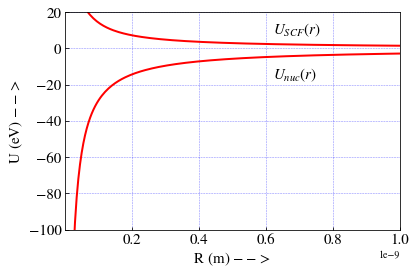

In [41]:
plot(R,UN,'r',lw=2)
plot(R,Uscf,'r',lw=2)
xlabel(' R (m) $-->$ ',fontsize=15)
ylabel(' U (eV) $-->$ ',fontsize=15)
xlim(0,1e-9)
ylim(-100,20)
tick_params(axis='both',which='major',labelsize=15,direction='in')
xticks(arange(0.2e-9,1.2e-9,0.2e-9),fontsize=15)
text(0.62e-9,8,'$U_{SCF}(r)$',fontsize=15)
text(0.62e-9,-17,'$U_{nuc}(r)$',fontsize=15)
grid(color='b', alpha=0.5, ls='--',lw=0.5)

<font color = "stone"><font size = "4" > __Fig. 3.1.5__ Self-consistent field method applied to the helium atom. (a) Nuclear potential $U_{nuc} (r)$ and the self-consistent electronic potential $U_{SCF}(r)$. </font>

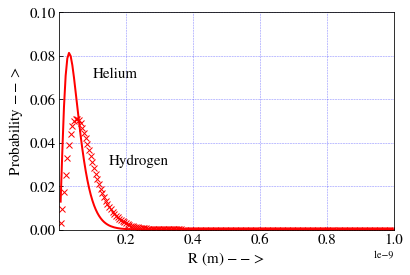

In [42]:
plot(R,P,'r',lw=2)
plot(R,P0,'rx',lw=2)
xlabel(' R (m) $-->$ ',fontsize=15)
ylabel(' Probability $-->$ ',fontsize=15)
xlim(0,1e-9)
ylim(0,0.1)
tick_params(axis='both',which='major',labelsize=15,direction='in')
xticks(arange(0.2e-9,1.2e-9,0.2e-9),fontsize=15)
text(0.1e-9,0.07,'Helium',fontsize=15)
text(0.15e-9,0.03,'Hydrogen',fontsize=15)
grid(color='b', alpha=0.5, ls='--',lw=0.5)

<font color = "stone"><font size = "4" > __Fig. 3.1.5__ Self-consistent field method applied to the helium atom. (b) Radial probability distribution for the 1s
state in helium and hydrogen. </font>

***

In [43]:
%reset -f
%matplotlib inline
from pylab import *

In [44]:
#Constants (all MKS, except energy which is in eV)
hbar=1.055e-34; m=9.110e-31; epsil=8.854e-12; q=1.602e-19;

#Lattice
Np=200; a=(10e-10/Np);
R=a*array(list(range(1,Np+1))); t0=(hbar**2)/(2*m*(a**2))/q; 

#Hamiltonian,H = Kinetic,T + Potential,U + Ul + Uscf
T=(2*t0*diag(ones((Np)))-(t0*diag(ones((Np-1)),1))-(t0*diag(ones((Np-1)),-1)));
UN=(-q*14/(4*pi*epsil))/R; # Z=14 for Silicon
l=1; Ul=(l*(l+1)*hbar*hbar/(2*m*q))/(R*R);
Uscf=zeros((Np)); change=1;

while change>0.1:
    [D,V]=eigh(T+diag(UN+Uscf)); DD=sort(D); ind=array(list(range(0,len(T))));
    E1s=D[ind[0]]; psi=V[:,ind[0]]; P1s=psi*conj(psi); P1s=transpose(P1s);
    E2s=D[ind[1]]; psi=V[:,ind[1]]; P2s=psi*conj(psi); P2s=transpose(P2s);
    E3s=D[ind[2]]; psi=V[:,ind[2]]; P3s=psi*conj(psi); P3s=transpose(P3s);
    
    [D,V]=eigh(T+diag(UN+Ul+Uscf)); DD=sort(D); ind=array(list(range(0,len(T))));
    E2p=D[ind[0]]; psi=V[:,ind[0]]; P2p=psi*conj(psi); P2p=transpose(P2p);
    E3p=D[ind[1]]; psi=V[:,ind[1]]; P3p=psi*conj(psi); P3p=transpose(P3p);
    n0=(2*(P1s+P2s+P3s))+(6*P2p)+(2*P3p);
    n=n0*(13/14);

    Unew=(q/(4*pi*epsil))*((sum(n/R)-cumsum(n/R))+(cumsum(n)/R));
    #Uex=(-q/(4*pi*epsil))*((n/(4*pi*a*R*R))**(1/3)); #Unew=Unew+Uex;
    change=sum(abs(Unew-Uscf))/Np; Uscf=Unew;

#analytical solutions for 1s hydrogen
a0=4*pi*epsil*hbar*hbar/(m*q*q);
P0=(4*a/(a0**3))*R*R*exp(-2*R/a0);

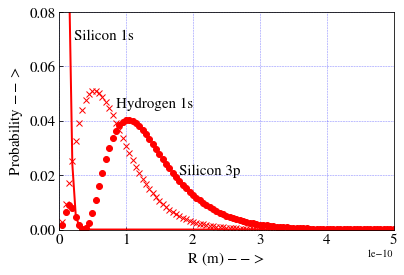

In [45]:
plot(R,P1s,'r',lw=2)
plot(R,P0,'rx',lw=2)
plot(R,P3p,'ro',lw=2)
xlabel(' R (m) $-->$ ',fontsize=15)
ylabel(' Probability $-->$ ',fontsize=15)
xlim(0,5e-10)
ylim(0,0.08)
tick_params(axis='both',which='major',labelsize=15,direction='in')
text(0.22e-10,0.07,'Silicon 1s',fontsize=15)
text(0.85e-10,0.045,'Hydrogen 1s',fontsize=15)
text(1.8e-10,0.02,'Silicon 3p',fontsize=15)
grid(color='b', alpha=0.5, ls='--',lw=0.5)

<font color = "stone"><font size = "4" > __Fig. 3.1.6__ Self-consistent field method applied to the silicon atom. The radial probability distributions for hydrogen 1s level and silicon 1s level and 3p level are shown. </font>

***

## <font color = "navy" >3.3 Covalent bonds </font> <a id="3.3"></a>

In [46]:
%reset -f
%matplotlib inline
from pylab import *

In [47]:
#Constants (all MKS, except energy which is in eV)
hbar=1.055e-34; m=9.110e-31; epsil=8.854e-12; q=1.602e-19;
a0=4*pi*epsil*hbar*hbar/(m*q*q); E0=q/(8*pi*epsil*a0);

R0=0.05*array(list(range(1,201)));
a=(-2*E0)*(1-(exp(-2*R0)*(1+R0)))/R0;
b=(-2*E0)*exp(-R0)*(1+R0);
s=(1+R0+((R0**2)/3))*exp(-R0);
Uee=(2*E0)/sqrt(1+(R0**2)); UNN=(2*E0)/R0;

EB0=(a+b)/(1+s); R=a0*R0;

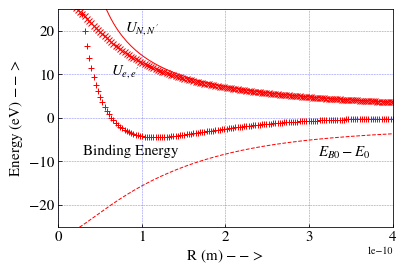

In [48]:
plot(R,EB0,'r--',lw=1)
plot(R,Uee,'rx',lw=1)
plot(R,UNN,'r',lw=1)
plot(R,(2*EB0)+UNN+Uee,'r+',lw=1)
xlabel(' R (m) $-->$ ',fontsize=15)
ylabel(' Energy (eV) $-->$ ',fontsize=15)
xlim(0,4e-10)
ylim(-25,25)
tick_params(axis='both',which='major',labelsize=15,direction='in')
text(0.8e-10,20,'$U_{N,N\'}$',fontsize=15)
text(0.63e-10,10,'$U_{e,e\'}$',fontsize=15)
text(0.3e-10,-8.5,'Binding Energy',fontsize=15)
text(3.1e-10,-9,'$E_{B0}-E_0$',fontsize=15)
grid(color='b', alpha=0.5, ls='--',lw=0.5)

<font color = "stone"><font size = "4" > __Fig. 3.3.4__ Various energies as a function of the nuclear distance R. ×××, approximate electron–electron repulsive energy $(U_{e,e'})$. Solid curve, nucleus–nucleus repulsive energy $(U_{N,N'})$. Dashed curve, $E_{B0}−E_0$; energy of the bonding level in a H$_2$ molecule relative to the 1s level in a hydrogen atom calculated approximately from the Schrodinger equation without any self-consistent potential. ++++, binding energy of a H$_2$ molecule relative to two hydrogen atoms estimated from $2(E_{B0}−E_0) + U_{N,N'} + U_{e,e'}$ . </font>

***

## <font color = "navy" >3.4 Supplementary notes: multi-electron picture </font> <a id="3.4"></a>

In [49]:
%reset -f
%matplotlib inline
from pylab import *

In [50]:
#Constants (all MKS, except energy which is in eV)
hbar=1.055e-34; q=1.602e-19; I0=q*q/hbar;

#Parameters
U0=0.5; # U0 is 0.25 for part(a), 0.1 for part (b)
kT=0.025; mu=0; ep=0.2;
g1=0.005; g2=0.005; g=g1+g2;
alphag=1; alphad=0.5;

#Bias
IV=101; VV=linspace(0,1,IV);

#Initializing arrays
p0=zeros((IV)); p1=zeros((IV)); p2=zeros((IV));

for iV in range(0,IV):
    Vd=0; Vg=VV[iV];
    mu1=mu; mu2=mu1-Vd; UL=-(alphag*Vg)-(alphad*Vd);
    f1=1/(1+exp((ep+UL-mu1)/kT)); f2=1/(1+exp((ep+UL-mu2)/kT));
    f1U=1/(1+exp((ep+UL+U0-mu1)/kT)); f2U=1/(1+exp((ep+UL+U0-mu2)/kT));
    P1=((g1*f1)+(g2*f2))/(1e-6+(g1*(1-f1))+(g2*(1-f2)));
    P2=P1*((g1*f1U)+(g2*f2U))/(1e-6+(g1*(1-f1U))+(g2*(1-f2U)));
    P0=1/(1+P1+P1+P2); P1=P1*P0; P2=P2*P0;
    p0[iV]=P0; p1[iV]=P1; p2[iV]=P2;

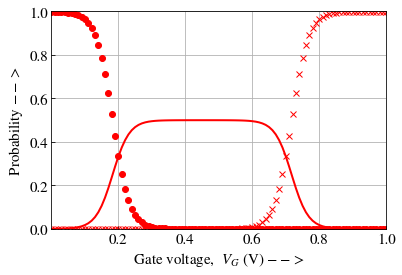

In [51]:
plot(VV,p0,'ro',lw=1)
plot(VV,p1,'r',lw=2)
plot(VV,p2,'rx',lw=1)
xlabel(' Gate voltage, $\ V_G$ (V) $-->$ ',fontsize=15)
ylabel(' Probability $-->$ ',fontsize=15)
xlim(0,1)
ylim(0,1)
tick_params(axis='both',which='major',labelsize=15,direction='in')
xticks(arange(0.2,1.2,0.2),fontsize=15)
grid(True)

<font color = "stone"><font size = "4" > __Fig. 3.4.2__ Evolution of the energy levels of a channel with one spin-degenerate level as the gate voltage $V_G$ is made more positive, holding the drain voltage $V_D$ equal to zero. $\mu$ = 0, $\epsilon$ = 0.2 eV, $k_BT$ = 0.025 eV, $U_0$ = 0.25 eV, $U_L$ =−$qV_G$. Lower plot shows the probabilities of finding the channel in one of its four states: $P_{00}(°)$, $P_{01}$ = $P_{10}$ (solid) and $P_{11}$ (×). </font>

***

In [52]:
%reset -f
%matplotlib inline
from pylab import *

In [53]:
#Constants (all MKS, except energy which is in eV)
hbar=1.055e-34; q=1.602e-19; I0=q*q/hbar;

#Parameters
U0=0.025;
kT=0.025; mu=0; ep=0.2;
g1=0.005; g2=0.005; g=g1+g2;
alphag=1; alphad=0.5;

#Bias
IV=101; VV=linspace(0,1.5,IV);

#Initializing arrays
I1=zeros((IV)); I2=zeros((IV));

for iV in range(0,IV):
    Vg=0; Vd=VV[iV]; #Vd=0; Vg=VV[iV];
    mu1=mu; mu2=mu1-Vd; UL=-(alphag*Vg)-(alphad*Vd);

    #Multielectron method
    f1=1/(1+exp((ep+UL+(U0/2)-mu1)/kT)); f2=1/(1+exp((ep+UL+(U0/2)-mu2)/kT));
    f1U=1/(1+exp((ep+UL+(U0/2)-mu1)/kT)); f2U=1/(1+exp((ep+UL+(U0/2)-mu2)/kT));
    P1=((g1*f1)+(g2*f2))/(1e-6+(g1*(1-f1))+(g2*(1-f2)));
    P2=P1*((g1*f1U)+(g2*f2U))/(1e-6+(g1*(1-f1U))+(g2*(1-f2U)));
    P0=1/(1+P1+P1+P2); P1=P1*P0; P2=P2*P0;
    
    I1[iV]=2*I0*((P0*g1*f1)-(P1*g1*(1-f1))+(P1*g1*f1U)-(P2*g1*(1-f1U)));
    I2[iV]=2*I0*((P0*g2*f2)-(P1*g2*(1-f2))+(P1*g2*f2U)-(P2*g2*(1-f2U)));

#Energy grid
NE=501; E=linspace(-1,1,NE); dE=E[1]-E[0];
D=(g/(2*pi))/((E**2)+((g/2)**2)); #Lorentzian Density of states per eV
D=D/(dE*sum(D)); #Normalizing to one

#Initializing arrays
N=zeros((IV)); I=zeros((IV));

#Bias
for iV in range(0,IV):
    Vg=0; Vd=VV[iV];
    mu1=mu; mu2=mu1-Vd; UL=-(alphag*Vg)-(alphad*Vd);
    U=0 # Self-consistent field
    dU=1;
    
    while dU>1e-6:
        F1=1/(1+exp((E+ep+UL+U-mu1)/kT)); 
        F2=1/(1+exp((E+ep+UL+U-mu2)/kT));
        N[iV]=dE*2*sum(D*((F1*g1/g)+(F2*g2/g)));
        Unew=U0*N[iV];
        dU=abs(U-Unew); U=U+0.1*(Unew-U);
    
    I[iV]=dE*2*I0*(sum(D*(F1-F2)))*(g1*g2/g);

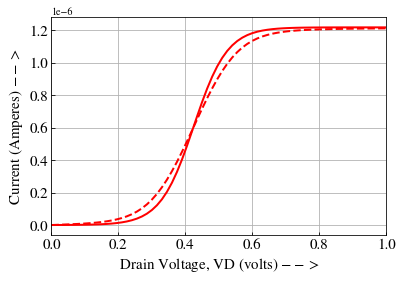

In [54]:
plot(VV,I1,'r',lw=2)
plot(VV,I,'r--',lw=2)
xlabel(' Drain Voltage, VD (volts) $-->$ ',fontsize=15)
ylabel(' Current (Amperes) $-->$ ',fontsize=15)
xlim(0,1)
ticklabel_format(style='sci',axis='y',scilimits=(0,0))
tick_params(axis='both',which='major',labelsize=15,direction='in')
grid(True)

<font color = "stone"><font size = "4" > __Fig. 3.4.3__ Current vs. drain voltage $V_D$ calculated assuming $V_G$ = 0 with $\mu$ = 0, $\epsilon$ = 0.2 eV, $k_BT$ = 0.025 eV, $\gamma_1$ = $\gamma_2$ = 0.005 eV, $U_L$ =−$qV_D / 2$. </font>

***

## <font color = "navy" >Exercises </font> <a id="3.E"></a>

In [55]:
%reset -f
%matplotlib inline
from pylab import *

In [56]:
#Constants (all MKS, except energy which is in eV)
hbar=1.055e-34; q=1.602e-19; I0=q*q/hbar;

#Parameters
U0=0.25; kT=0.025; mu=0; ep=0.2;
g1=0.005; g2=0.005; g=g1+g2;
alphag=1; alphad=0.5;

#Energy grid
NE=501; E=linspace(-1,1,NE); dE=E[1]-E[0];
D=(g/(2*pi))/((E**2)+((g/2)**2)); #Lorentzian Density of states per eV
D=D/(dE*sum(D)); #Normalizing to one

#Bias
IV=101; VV=linspace(0,1,IV);

#Initializing arrays
Nup=zeros((IV)); Ndn=zeros((IV)); Iup=zeros((IV)); Idn=zeros((IV)); 

for iV in range(0,IV):
    Vg=0; Vd=VV[iV];
    mu1=mu; mu2=mu1-Vd; UL=-(alphag*Vg)-(alphad*Vd);
    Uup=0; Udn=0.1; #Unrestricted self-consistent field
    dU=1;
    
    while dU>0.001:
        f1up=1/(1+exp((E+ep+UL+Uup-mu1)/kT)); 
        f2up=1/(1+exp((E+ep+UL+Uup-mu2)/kT));
        Nup[iV]=dE*sum(D*((f1up*g1)+(f2up*g2))/(g1+g2));
        f1dn=1/(1+exp((E+ep+UL+Udn-mu1)/kT));
        f2dn=1/(1+exp((E+ep+UL+Udn-mu2)/kT));
        Ndn[iV]=dE*sum(D*((f1dn*g1)+(f2dn*g2))/(g1+g2));
        Udnnew=2*U0*(Nup[iV]-0.5); Udn=Udn+0.1*(Udnnew-Udn);
        Uupnew=2*U0*(Ndn[iV]-0.5); Uup=Uup+0.1*(Uupnew-Uup);
        dU=abs(Uup-Uupnew)+abs(Udn-Udnnew);
        
    Iup[iV]=dE*I0*(sum(D*(f1up-f2up)))*(g1*g2/g);
    Idn[iV]=dE*I0*(sum(D*(f1dn-f2dn)))*(g1*g2/g);

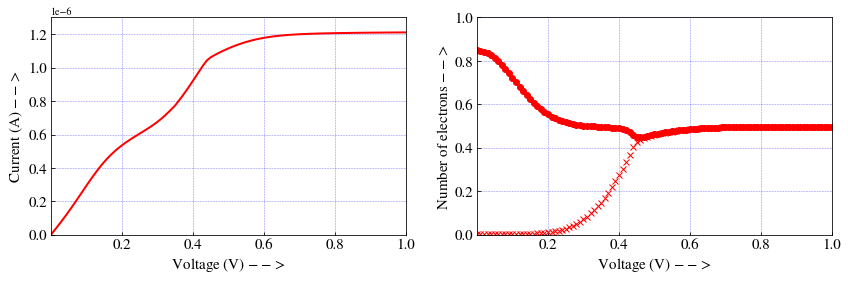

In [57]:
figure(figsize=(14,4))
subplot(1,2,1)
plot(VV,Iup+Idn,'r',lw=2)
xlabel(' Voltage (V) $-->$ ',fontsize=15)
ylabel(' Current (A) $-->$ ',fontsize=15)
xlim(0,1)
ylim(0,1.3e-6)
ticklabel_format(style='sci',axis='y',scilimits=(0,0))
tick_params(axis='both',which='major',labelsize=15,direction='in')
xticks(arange(0.2,1.2,0.2),fontsize=15)
grid(color='b', alpha=0.5, ls='--',lw=0.5)

subplot(1,2,2)
plot(VV,Nup,'ro',lw=2)
plot(VV,Ndn,'rx',lw=2)
xlabel(' Voltage (V) $-->$ ',fontsize=15)
ylabel(' Number of electrons $-->$ ',fontsize=15)
xlim(0,1)
ylim(0,1)
ticklabel_format(style='sci',axis='y',scilimits=(0,0))
tick_params(axis='both',which='major',labelsize=15,direction='in')
xticks(arange(0.2,1.2,0.2),fontsize=15)
grid(color='b', alpha=0.5, ls='--',lw=0.5)

<font color = "stone"><font size = "4" > __Fig. E.3.5c__ Unrestricted scf </font>